In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
%matplotlib inline

In [2]:
import sys
from PIL import Image
sys.modules['Image'] = Image 

In [3]:
#importing required libraries
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img ,img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix

In [4]:
my_data_dir = r'C:\Users\shubh\Downloads\casting_data'

In [5]:
train_path = my_data_dir + 'train/'

In [6]:
test_path = my_data_dir + 'test/'

In [7]:
image_shape = (300,300,1)
batch_size = 32 #according your model and your choice

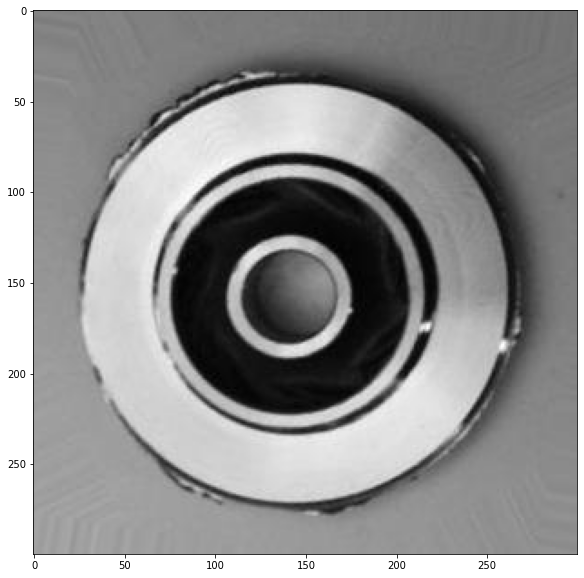

In [8]:
img1 = plt.imread(r'C:\Users\shubh\Downloads\casting_data\casting_data\train\def_front\cast_def_0_1004.jpeg')
plt.figure(figsize=(12,10))
plt.imshow(img1,cmap='gray')

In [9]:
image_gen = ImageDataGenerator(rescale=1/255)# Rescale the image by normalzing it)

In [10]:
#we using keras inbuild function to ImageDataGenerator so we donnot need to lable all images into 0 and 1 it automatic create it and batch also during trainng 
train_set = image_gen.flow_from_directory(r'C:\Users\shubh\Downloads\casting_data\casting_data\train',
                                               target_size=image_shape[:2],
                                                color_mode="grayscale",
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=True)

test_set = image_gen.flow_from_directory(r'C:\Users\shubh\Downloads\casting_data\casting_data\test',
                                               target_size=image_shape[:2],
                                               color_mode="grayscale",
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [11]:
#Creating model

model = Sequential()

model.add(Conv2D(filters=8, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))




model.add(Flatten())

model.add(Dense(224))
model.add(Activation('relu'))

# Last layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [13]:
results = model.fit_generator(train_set,epochs=6,
                              validation_data=test_set,
                             callbacks=[early_stop])

Epoch 1/20
208/208 [==============================] - 136s 655ms/step - loss: 0.0348 - accuracy: 0.9911 - val_loss: 0.0413 - val_accuracy: 0.9916
Epoch 2/20
208/208 [==============================] - 157s 753ms/step - loss: 0.0401 - accuracy: 0.9870 - val_loss: 0.0549 - val_accuracy: 0.9874
Epoch 3/20
208/208 [==============================] - 150s 722ms/step - loss: 0.0310 - accuracy: 0.9902 - val_loss: 0.0380 - val_accuracy: 0.9930
Epoch 4/20
208/208 [==============================] - 136s 654ms/step - loss: 0.0120 - accuracy: 0.9973 - val_loss: 0.0217 - val_accuracy: 0.9944
Epoch 5/20
208/208 [==============================] - 137s 659ms/step - loss: 0.0101 - accuracy: 0.9977 - val_loss: 0.0310 - val_accuracy: 0.9916
Epoch 6/20
208/208 [==============================] - 163s 785ms/step - loss: 0.0082 - accuracy: 0.9980 - val_loss: 0.0261 - val_accuracy: 0.9930
